# Discussão de casos

## Caso 1: Simulando exploração de Dados em dataset financeiro

**O Dataset: Inadimplência em cartões de crédito** <br>
Esse dataset está disponível no [Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/data?select=UCI_Credit_Card.csv). No link constam informações detalhadas sobre as variáveis presentes, bem como o contexto do negócio.

Em resumo, o dataset contém informações sobre pagamentos, fatores demográficos e inadimplência/adimplência da fatura do cartão de crédito.


**Conteúdo:**
* ID: ID de cada cliente
* SEX: 1 = homem, 2 = mulher
* EDUCATION: 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* default.payment.next.month: Default payment (1=yes, 0=no)


Inspiration
Some ideas for exploration:

How does the probability of default payment vary by categories of different demographic variables?
Which variables are the strongest predictors of default payment?

**Problema:** Você é um analista de crédito em uma empresa financeira que cobra juros diferentes de seus clientes de acordo com o score de risco. Hoje o score divide os clientes em faixas de acordo com a idade, no entanto o CFO lhe encarregou de avaliar se esse método é eficiente. Caso positivo ou negativo, ele espera que um formato de ajuste do score seja proposto.

Para tanto, você tem acesso a variáveis demográficas e financeiras dos clientes, bem como a indicação de inadimplência e deve explorar a base histórica.

In [1]:
import pandas as pd
df = pd.read_csv('UCI_Credit_Card.csv')

df['inadimplente'] = df['default.payment.next.month']
df['sexo'] = df['SEX']
df['educacao'] = df['EDUCATION']
df['estado_civil'] = df['MARRIAGE']
df['idade'] = df['AGE']
df['vl_fatura'] = df['BILL_AMT6']

df = df[['sexo', 'educacao', 'estado_civil','idade', 'vl_fatura', 'inadimplente']]

df.to_csv('UCI_Cartao_Credito.csv', index = False)

In [2]:
import pandas as pd
df = pd.read_csv('UCI_Cartao_Credito.csv')

In [3]:
df.dtypes 

sexo              int64
educacao          int64
estado_civil      int64
idade             int64
vl_fatura       float64
inadimplente      int64
dtype: object

In [4]:
df.describe()

,sexo,educacao,estado_civil,idade,vl_fatura,inadimplente
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867,35.485500,38871.760400,0.221200
std,0.489129,0.790349,0.521970,9.217904,59554.107537,0.415062
min,1.000000,0.000000,0.000000,21.000000,-339603.000000,0.000000
25%,1.000000,1.000000,1.000000,28.000000,1256.000000,0.000000
50%,2.000000,2.000000,2.000000,34.000000,17071.000000,0.000000
75%,2.000000,2.000000,2.000000,41.000000,49198.250000,0.000000
max,2.000000,6.000000,3.000000,79.000000,961664.000000,1.000000


In [5]:
df.head(2)

,sexo,educacao,estado_civil,idade,vl_fatura,inadimplente
0,2,2,1,24,0.0,1
1,2,2,2,26,3261.0,1


In [6]:
# Corrigindo tipos
df['sexo'] = df['sexo'].astype(str)
df['educacao'] = df['educacao'].astype(str)
df['estado_civil'] = df['estado_civil'].astype(str)
df['inadimplente'] = df['inadimplente'].astype(str)

In [7]:
df.describe()

,idade,vl_fatura
count,30000.000000,30000.000000
mean,35.485500,38871.760400
std,9.217904,59554.107537
min,21.000000,-339603.000000
25%,28.000000,1256.000000
50%,34.000000,17071.000000
75%,41.000000,49198.250000
max,79.000000,961664.000000


In [8]:
# Removendo faturas com valor <= 0
df = df[df['vl_fatura']> 0].reset_index(drop=True)

In [9]:
df.describe()

,idade,vl_fatura
count,25292.000000,25292.000000
mean,35.437451,46191.209197
std,9.244178,62103.183037
min,21.000000,1.000000
25%,28.000000,6634.500000
50%,34.000000,22635.000000
75%,41.000000,59188.250000
max,79.000000,961664.000000


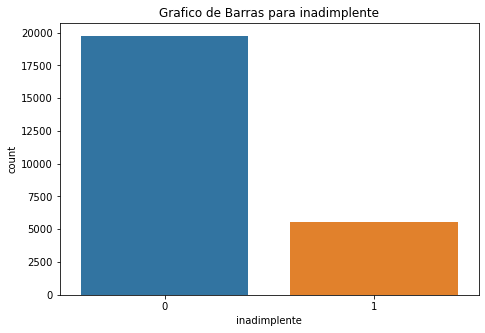

In [10]:
# Vamos avaliar a distribuição de dados para variáveis categóricas
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7.5,5))

variaveis_plt = ['inadimplente']
for i, var in enumerate(variaveis_plt):
    plt.subplot(1,1,i+1)
    sns.countplot(df[var])
    plt.title("Grafico de Barras para " + var)   
    if var == 'idade':
        plt.xticks(rotation = 90, size = 7)

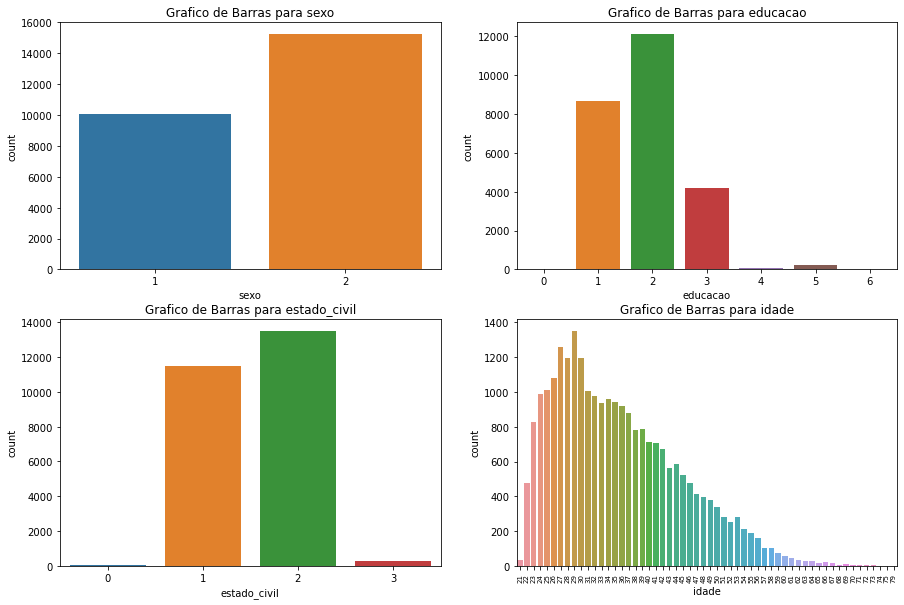

In [11]:
# Vamos avaliar a distribuição de dados para os fatores
import matplotlib.pyplot as plt
import seaborn as sns

# Idade tratada como categoria: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5806344/

plt.figure(figsize=(15,10))

variaveis_plt = ['sexo', 'educacao', 'estado_civil', 'idade']
for i, var in enumerate(variaveis_plt):
    plt.subplot(2,2,i+1)
    sns.countplot(x = var, data = df)
    plt.title("Grafico de Barras para " + var)   
    if var == 'idade':
        plt.xticks(rotation = 90, size = 7)

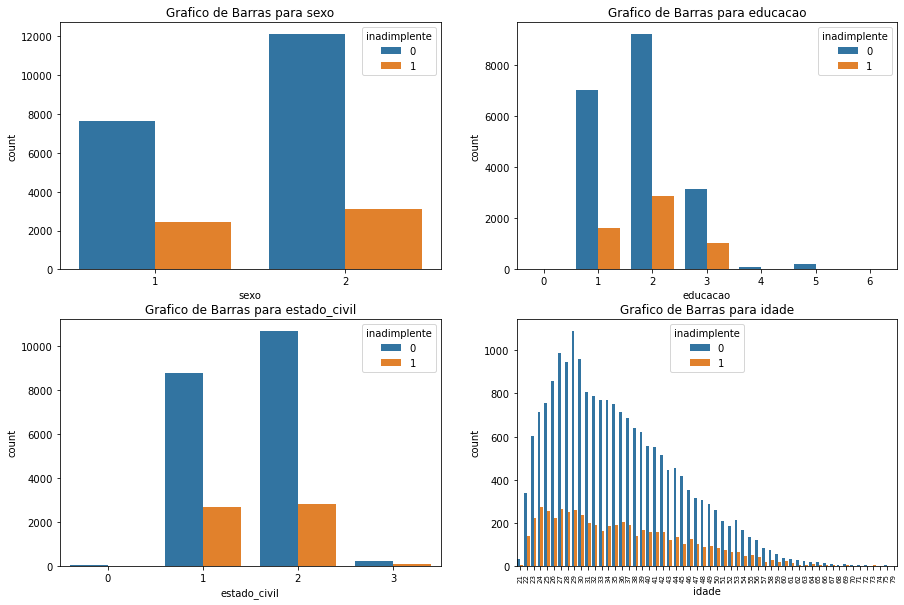

In [12]:
# Vamos avaliar a distribuição de dados para variáveis categóricas, separando inadimplentes de adimplentes

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))

variaveis_plt = ['sexo', 'educacao', 'estado_civil', 'idade']
for i, var in enumerate(variaveis_plt):
    plt.subplot(2,2,i+1)
    sns.countplot(x = var, hue = 'inadimplente', data = df)
    plt.title("Grafico de Barras para " + var)   
    if var == 'idade':
        plt.xticks(rotation = 90, size = 7)

In [13]:
# Calculando porcentagem de inadimplentes por cada categoria
var = 'sexo'
df['pct_inad'] = df['vl_fatura']

df_2 = df.groupby(['inadimplente', var]).count()[['pct_inad']].groupby(level=[0]).apply(lambda g: round(100*g / g.sum())).reset_index()
df_var = df_2[df_2['inadimplente'] == '1'][[var, 'pct_inad']]

df_var

,sexo,pct_inad
2,1,44.0
3,2,56.0


In [14]:
# Calculando porcentagem de inadimplentes por cada categoria
var = 'educacao'
df['pct_inad'] = df['vl_fatura']

df_2 = df.groupby(['inadimplente', var]).count()[['pct_inad']].groupby(level=[0]).apply(lambda g: round(100*g / g.sum())).reset_index()
df_var = df_2[df_2['inadimplente'] == '1'][[var, 'pct_inad']]

df_var

,educacao,pct_inad
7,1,29.0
8,2,52.0
9,3,19.0
10,4,0.0
11,5,0.0
12,6,0.0


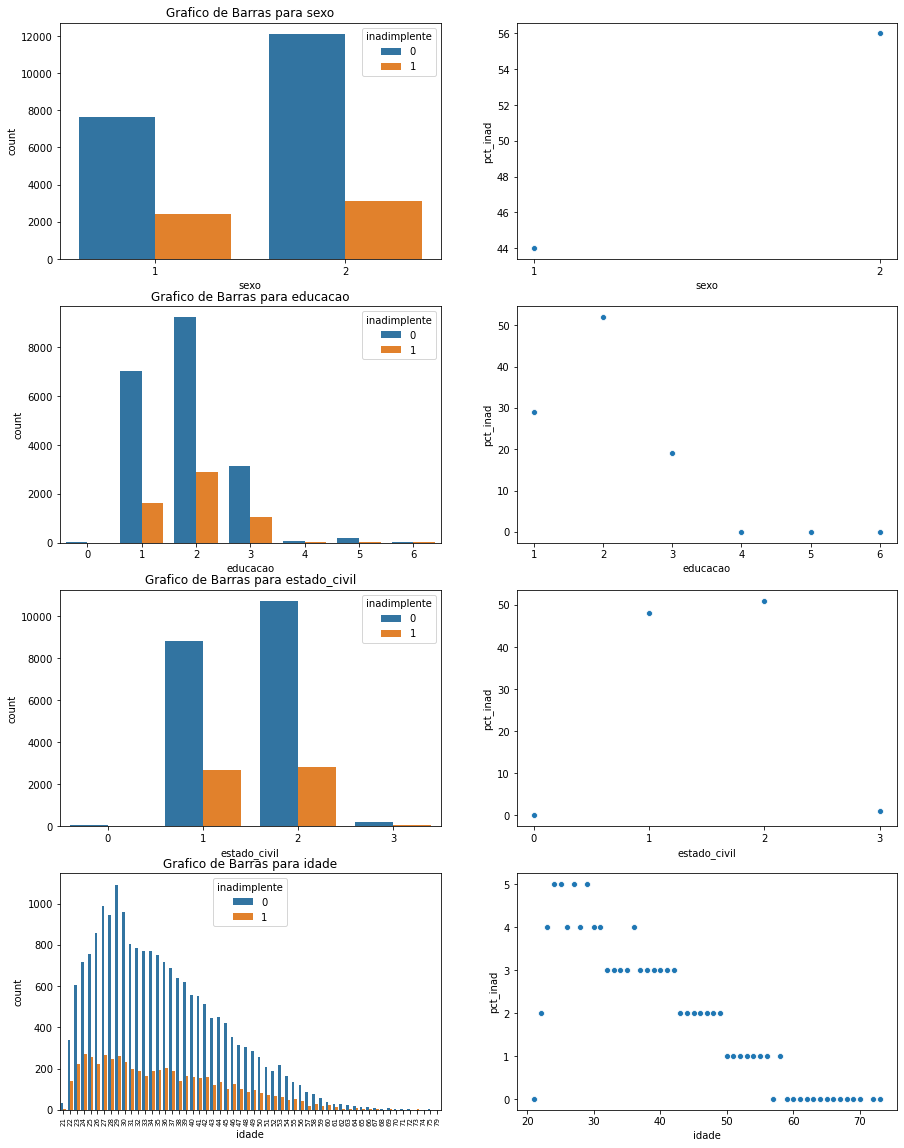

In [15]:
# Vamos avaliar a distribuição de dados para variáveis categóricas, separando inadimplentes de adimplentes e unindo a avaliação de porcentagem
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,20))

df['pct_inad'] = df['vl_fatura']

variaveis_plt = ['sexo', 'educacao', 'estado_civil', 'idade']
i = 0
for var in variaveis_plt:
    
    # Gráfico de Barras
    i = i+1
    plt.subplot(4,2,i)
    sns.countplot(x = var, hue = 'inadimplente', data = df)
    plt.title("Grafico de Barras para " + var)   
    if var == 'idade':
        plt.xticks(rotation = 90, size = 7)
        
    
    # Plot porcentagem
    i = i+1
    plt.subplot(4,2,i)
    df_2 = df.groupby(['inadimplente', var]).count()[['pct_inad']].groupby(level=[0]).apply(lambda g: round(100*g / g.sum())).reset_index()
    df_var = df_2[df_2['inadimplente'] == '1'][[var, 'pct_inad']]

    sns.scatterplot(x = var, y = 'pct_inad', data = df_var)
 

In [16]:
# Vamos aprimorar a análise para idade, criando faixas
# Cria faixa de idade
category = pd.cut(df['idade'],bins=[0,20,30,40,50,60,70,80,90,100],
                  labels=['<20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
df.insert(5,'faixa_idade',category)
df['faixa_idade'] = df['faixa_idade'].astype(str)


In [17]:
df.head()

,sexo,educacao,estado_civil,idade,vl_fatura,faixa_idade,inadimplente,pct_inad
0,2,2,2,26,3261.0,20-30,1,3261.0
1,2,2,2,34,15549.0,30-40,0,15549.0
2,2,2,1,37,29547.0,30-40,0,29547.0
3,1,2,1,57,19131.0,50-60,0,19131.0
4,1,1,2,37,20024.0,30-40,0,20024.0


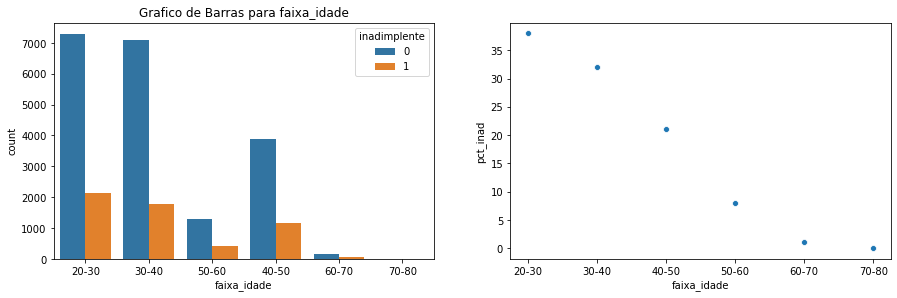

In [18]:
# Visualizando faixas de idade
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,20))

df['pct_inad'] = df['vl_fatura']

variaveis_plt = ['faixa_idade']
i = 0
for var in variaveis_plt:
    
    # Gráfico de Barras
    i = i+1
    plt.subplot(4,2,i)
    sns.countplot(x = var, hue = 'inadimplente', data = df)
    plt.title("Grafico de Barras para " + var)   
    if var == 'idade':
        plt.xticks(rotation = 90, size = 7)
        
    
    # Plot porcentagem
    i = i+1
    plt.subplot(4,2,i)
    df_2 = df.groupby(['inadimplente', var]).count()[['pct_inad']].groupby(level=[0]).apply(lambda g: round(100*g / g.sum())).reset_index()
    df_var = df_2[df_2['inadimplente'] == '1'][[var, 'pct_inad']]

    sns.scatterplot(x = var, y = 'pct_inad', data = df_var)
 

In [19]:
# E a variável quantitativa?

# Precisamos investigar se o valor da fatura apresenta indícios de relação com a inadimplência
print('Estatística descritiva para valor da fatura')
df[['vl_fatura']].describe()

Estatística descritiva para valor da fatura


,vl_fatura
count,25292.000000
mean,46191.209197
std,62103.183037
min,1.000000
25%,6634.500000
50%,22635.000000
75%,59188.250000
max,961664.000000


In [20]:
# Vamos agora separar as contas inadimplentes das adimplentes
print('Estatística descritiva para valor da fatura filtrando adimplentes')
df[df['inadimplente'] == '0' ][['vl_fatura']].describe()

Estatística descritiva para valor da fatura filtrando adimplentes


,vl_fatura
count,19742.000000
mean,46279.407507
std,62080.088643
min,1.000000
25%,6139.500000
50%,22330.500000
75%,60048.250000
max,961664.000000


In [21]:
# Vamos agora separar as contas inadimplentes das adimplentes
print('Estatística descritiva para valor da fatura filtrando inadimplentes')
df[df['inadimplente'] == '1' ][['vl_fatura']].describe()

Estatística descritiva para valor da fatura filtrando inadimplentes


,vl_fatura
count,5550.000000
mean,45877.477477
std,62189.847870
min,10.000000
25%,8254.000000
50%,23173.000000
75%,55495.000000
max,514975.000000


Text(0.5, 1.0, 'Inadimplência por valor da fatura')

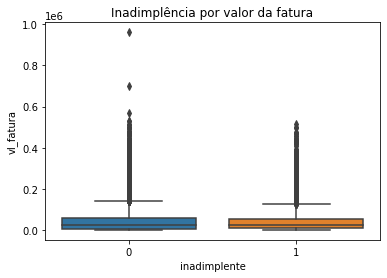

In [22]:
# Vamos agora avaliar graficamente.
sns.boxplot(x = 'inadimplente', 
            y = 'vl_fatura', 
            data = df).set_title('Inadimplência por valor da fatura')

Text(0.5, 1.0, 'Inadimplência por valor da fatura - extremos removidos')

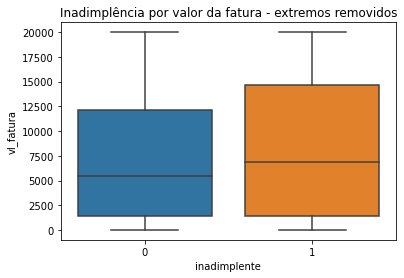

In [23]:
# Removendo os extremos ...
sns.boxplot(x = 'inadimplente', 
            y = 'vl_fatura', 
            data = df[df['vl_fatura']<20000]).set_title('Inadimplência por valor da fatura - extremos removidos')

**Com base no que observamos, você removeria o valor da fatura entre candidatos para o novo scoring de inadimplência?**

Text(0.5, 1.0, 'Inadimplência por valor da fatura - extremos removidos')

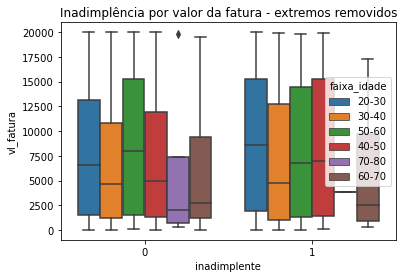

In [24]:
# Será que existe alguma interação entre vl_fatura e outras variáveis?
sns.boxplot(x = 'inadimplente', 
            y = 'vl_fatura', 
            hue = 'faixa_idade', 
            data = df[df['vl_fatura']<20000]).set_title('Inadimplência por valor da fatura - extremos removidos')

Text(0.5, 1.0, 'Inadimplência por valor da fatura e faixa de idade')

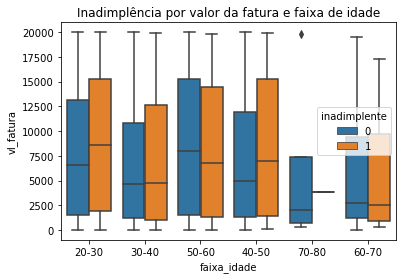

In [25]:
# Vamos facilitar nossa comparação, inventendo hue pelo eixo x
sns.boxplot(x = 'faixa_idade', 
            y = 'vl_fatura', 
            hue = 'inadimplente', 
            data = df[df['vl_fatura']<20000]).set_title('Inadimplência por valor da fatura e faixa de idade')

Text(0.5, 1.0, 'Inadimplência por valor da fatura e faixa de idade')

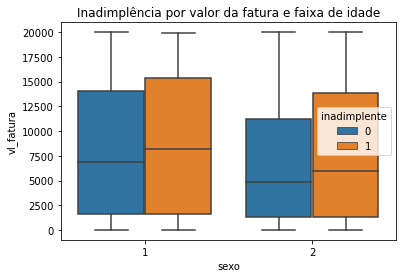

In [26]:
# Também podemos avaliar a interação com os outros fatores categóricos

# Sexo x Inadimplência X Valor da Fatura
sns.boxplot(x = 'sexo', 
            y = 'vl_fatura', 
            hue = 'inadimplente', 
            data = df[df['vl_fatura']<20000]).set_title('Inadimplência por valor da fatura e faixa de idade')

Text(0.5, 1.0, 'Inadimplência por valor da fatura e faixa de idade')

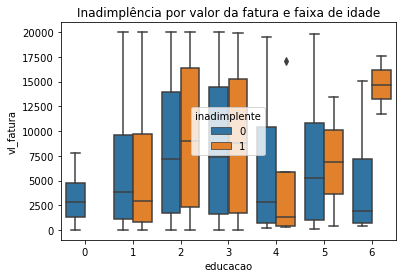

In [27]:
# Educação x Inadimplência X Valor da Fatura
sns.boxplot(x = 'educacao',
            y = 'vl_fatura', 
            hue = 'inadimplente', 
            data = df[df['vl_fatura']<20000]).set_title('Inadimplência por valor da fatura e faixa de idade')

Text(0.5, 1.0, 'Inadimplência por valor da fatura e faixa de idade')

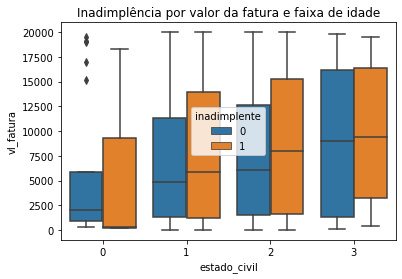

In [28]:
# Educação x Inadimplência X Valor da Fatura
sns.boxplot(x = 'estado_civil', 
            y = 'vl_fatura', 
            hue = 'inadimplente', 
            data = df[df['vl_fatura']<20000]).set_title('Inadimplência por valor da fatura e faixa de idade')

## Que conclusão podemos tomar após essa comparação?

R: Que algumas das variáveis visualizadas podem estar relacionadas a inadimplência.

Próximos passos:
    * Refinar a análise exploratória
    * Definir hipóteses
    * Avaliar com estatística inferencial essas comparações, e aprimorar o modelo inicial
    * Criar um modelo com machine learning

In [29]:
import numpy as np

In [30]:
np.mean([0,8.7,8.7,9.0,9.5,10,10,10,10,10])

8.59

In [31]:
np.median([0,8.7,8.7,9.0,9.5,10,10,10,10,10])

9.75

Text(0.5, 1.0, 'Distribuição Notas na prova final do CFC')

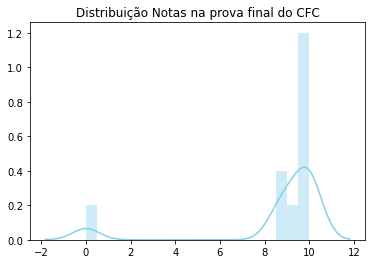

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

notas_finais_cfc = [0,8.7,8.7,9.0,9.5,10,10,10,10,10]
sns.distplot(notas_finais_cfc, color = 'skyblue', 
             label = 'nota_final_CFC', bins = 20).set_title('Distribuição Notas na prova final do CFC')

In [33]:
np.mean([0,8.7,8.7,9.0,9.5,10,10,10,10,10])

8.59

In [34]:
np.median([0,8.7,8.7,9.0,9.5,10,10,10,10,10])

9.75

In [35]:
df2 = pd.read_csv('carteira_medicina_familia_sintetica.csv',encoding='ISO-8859-1',delimiter=';',low_memory = False)
df2.head()

,id_patient,age_years,sex,number_of_children,flag_married,bmi_kg_m2,height_cm,weight_kg,hdl_mg_dl,ldl_mg_dl,...,index_systolic_blood_pressure,index_diastolic_blood_pressure,index_blood_pressure,sum_index_disease,avg_index_disease,target_index_disease,clients,unidade,mfc,new_score
0,1,23.600347,1,0,0,23.765629,151.049106,54.223261,67.119601,94.935636,...,1,2,3,18,1.636364,0,client04,un06,mfc21,0.000006
1,2,28.180492,1,0,0,22.891895,161.449691,59.670019,69.234692,95.230407,...,1,2,3,18,1.636364,0,client04,un12,mfc39,0.000006
2,3,24.916474,1,0,0,25.687941,156.140406,62.626754,60.938429,99.944524,...,1,2,3,20,1.818182,0,client04,un09,mfc27,0.037970
3,4,28.489040,1,0,0,22.802512,163.527442,60.976709,62.430110,94.763726,...,1,2,3,19,1.727273,0,client05,un15,mfc51,0.000040
4,5,23.580738,1,0,0,23.347263,162.206615,61.428950,64.926035,85.078514,...,1,1,1,16,1.454545,0,client06,un02,mfc59,0.000009


Text(0.5, 1.0, 'Distribuição de Altura na Carteira de Medicina Familiar')

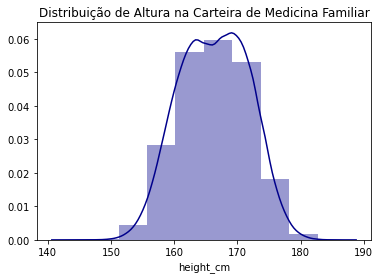

In [36]:
sns.distplot(df2['height_cm'] , color = 'darkblue', 
             label = 'var_continua_1', 
             bins=10, hist=True).set_title('Distribuição de Altura na Carteira de Medicina Familiar')

## Variância

A variância, comumente designada pela letra grega sigma ao quadrado $\sigma^2$ ou pela letra $S$ ou simplesmente $\text{ var}(x)$ sendo x uma variável aleatória, é uma medida de dispersão estatística, ou seja avalia como os dados em uma dada amostra populacional está espalhada. A fórmula matemática para o cálculo da variância é dada pela equação a seguir

\begin{equation}
\sigma^2 = \frac{1}{n-1}\sum_{i = 1}^{}(x_i − \bar{x})^2,
\end{equation}

sendo $\bar{x} = \frac{1}{n}\sum_i x_i$ a média da amostra.

### Exemplo 1

In [37]:
x = [8, 1.8, 4.5, 4.5, 25]

x_media = np.mean(x)
print('Media: ', x_media)

Media:  8.76


In [38]:
x_soma = (8 - x_media)**2 + (1.8 - x_media)**2 + (4.5 - x_media)**2 + (4.5 - x_media)**2 + (25 - x_media)**2
print('Somatoria: ', x_soma)

Somatoria:  349.052


In [39]:
# Modo incorreto:
print((8 - x_media) + (1.8 - x_media) + (4.5 - x_media) + (4.5 - x_media) + (25 - x_media))
# 

0.0


In [40]:
1 / (5 - 1)

0.25

In [41]:
# Variância: 
0.25 * 349.052

87.263

In [42]:
x = [8, 1.8, 4.5, 4.5, 25]

media_x = np.mean(x)

print('Media', media_x)

# Parte inicial da equação da variância
val_1 = 1/(5-1)

# Parte final da equação da variância
val_2 = (8- media_x)**2 + (1.8 - media_x)**2 + (4.5 - media_x)**2 + (4.5 - media_x)**2 + (25 - media_x)**2

# Modo errado, sem elevar ao quadrado
#val_2 = (8- media_x) + (1.8 - media_x) + (4.5 - media_x) + (4.5 - media_x) + (25 - media_x)
          

# Variância
val_1 * val_2

Media 8.76


87.263

In [43]:
x = [8, 1.8, 4.5, 4.5, 25]

n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n - 1)
print(var_)

87.263


In [44]:
import statistics
statistics.variance(x)

87.263

In [45]:
# Método do Raphael
def variancia(i):
    media = np.mean(i)
    soma = 0
    for x in i:
        soma += (x - media)**2
    return soma / (len(i)-1)


variancia(i = [8, 1.8, 4.5, 4.5, 25])

87.263

### Exemplo 2

Calculando a variância da altura da amostra Distribuição de Altura na Carteira de Medicina Familiar

In [46]:
df2['height_cm'].var()

30.332794173289436

In [47]:
df2['height_cm'][:20]

0     151.049106
1     161.449691
2     156.140406
3     163.527442
4     162.206615
5     158.539932
6     159.664250
7     161.319338
8     157.023768
9     162.745233
10    161.192918
11    164.688890
12    160.282837
13    160.427520
14    156.625667
15    159.050400
16    163.166785
17    164.668160
18    155.142977
19    160.278368
Name: height_cm, dtype: float64

In [48]:
df2['height_cm'].mean()

166.30274172077557

In [49]:
# Limite Inferior
166 - 5.5

160.5

In [50]:
# Limite Superior
166 + 5.5

171.5

In [51]:
[160.5, 171.5]

df2['height_cm'][:10]

0    151.049106
1    161.449691
2    156.140406
3    163.527442
4    162.206615
5    158.539932
6    159.664250
7    161.319338
8    157.023768
9    162.745233
Name: height_cm, dtype: float64

In [52]:
df2['height_cm'][150:160]

150    161.141250
151    164.232163
152    157.269379
153    163.098530
154    158.618594
155    168.260732
156    163.602296
157    160.027963
158    161.151716
159    167.764784
Name: height_cm, dtype: float64

## Desvio Padrão

O desvio padrão da amostra está relacionado diretamente a variância. Ele é calculado pela raiz quadrada da variância. É uma medida muito mais útil que a variância por está na mesma unidade que os dados, facilitando sua interpretação.

\begin{equation}
\sigma = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2}.
\end{equation}

### Exemplo 1

In [53]:
np.sqrt(30.33)

5.5072679252057455

In [54]:
x = [8, 1.8, 4.5, 4.5, 25]

n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n - 1)

sd = var_ ** 0.5

# ou

sd = np.sqrt(var_)

print(sd)

9.341466694261667


In [55]:
statistics.variance(x) ** .5

9.341466694261667

In [56]:
statistics.stdev(x)

9.341466694261667

### Exemplo 2

Calculando a variância da altura da amostra Distribuição de Altura na Carteira de Medicina Familiar

In [57]:
df2['height_cm'].std()

5.507521599893135

In [58]:
df2['height_cm'].mean()

166.30274172077557

In [59]:
# Limite Inferior
166-5.5

160.5

In [60]:
# Limite Superior
166+5.5

171.5

# Caso 2: Paradoxo de Simpson

Nesta análise de caso vamos abordar um tema interessante e complexo, o Paradoxo de Simpson. Este paradoxo é um fenômeno probabilístico e estatístico no qual é possível chegar a conclusões antagônicas a partir de um mesmo dataset, dependendo do nível de agrupamento no qual se está realizando as análises. Este tema é muito importante para cientistas de dados e analistas de dados e de negócios, pois trata do assunto de causalidade em análises. Este tipo de paradoxo é resolvido quando abrimos nossas análises em maior granularidade. 

## O caso Berkeley

Um exemplo icônico do paradoxo de Simpson é o caso da Universidade Berkeley da Califórnia que foi processada na década de 1970 sob a acusação de sexismo nos programas de doutorado de seus institutos, privilegiando homens em detrimento de mulheres. Tudo isto começou com a divulgação do número de aplicantes, dividido por sexo, e o percentual de admitidos para cada um dos sexos. O percentual de homens admitidos era mquase 10 pontos percentuais maior que o de mulheres, como mostra a tabela abaixo, contendo os números reais do processo.

|           |     Men    |          |    Women   |          |
|:---------:|:----------:|:--------:|:----------:|:--------:|
|           | Applicants | Admitted | Applicants | Admitted |
|   Total   |    8.442   |    44%   |    4.321   |    35%   |

Eventualmente a universidade de Berkeley foi absolvida da acusação de sexismo após apresentar os mesmos resultados de forma mais granular e provando que ao contrário do que se imaginava eram as mulheres que eram privilegiadas percentualmente quando a análise era observada por departamentos da universidade, como mostra a tabela abaixo, contendo dados reais do caso Berkeley.

|            |     Men    |          |    Women   |          |
|:----------:|:----------:|:--------:|:----------:|:--------:|
| Department | Applicants | Admitted | Applicants | Admitted |
|      B     |     560    |    63%   |      25    |    68%   |
|      C     |     325    |    37%   |     593    |    34%   |
|      D     |     417    |    33%   |     375    |    35%   |
|      E     |     191    |    28%   |     393    |    24%   |
|      F     |     373    |     6%   |     341    |     7%   |

**Referências sobre o caso Berkeley**
* David Freedman, Robert Pisani, and Roger Purves (2007), Statistics (4th edition), W. W. Norton. ISBN 0-393-92972-8.
* P.J. Bickel, E.A. Hammel and J.W. O'Connell (1975). "Sex Bias in Graduate Admissions: Data From Berkeley" (PDF). Science. 187 (4175): 398–404. doi:10.1126/science.187.4175.398. PMID 17835295.
* http://jse.amstat.org/v22n1/mickel.pdf
* https://pubmed.ncbi.nlm.nih.gov/29484824/

**Observações**
* Tabelas retiradas de: https://en.wikipedia.org/wiki/Simpson%27s_paradox
* Site interessante para criar tabelas em difrentes editores de texto: https://www.tablesgenerator.com/markdown_tables



## Conhecendo o dataset

Vamos começar lendo o dataset sobre o paradoxo de Simpson e fazendo algumas verificações básicas sobre o dataset, como por exemplo verificar quais features fazem parte dos nossos dados, além das informações dos tipos de variáveis e o tamanho do dataset. Para realizar estas análises vamos utilizar funções básicas da biblioteca Pandas.

In [61]:
import pandas as pd

dfsimpson = pd.read_csv('df_paradoxo_simpson.csv',encoding='ISO-8859-1',delimiter=';',low_memory = False)

dfsimpson = dfsimpson.drop('Unnamed: 0', axis=1)

dfsimpson.head()

,idade,flag_aceito,sexo,departamento
0,37.798818,0,M,A
1,42.188624,0,M,A
2,39.703209,0,M,A
3,32.216175,0,M,A
4,42.772410,0,M,A


In [62]:
dfsimpson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4261 entries, 0 to 4260
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   idade         4261 non-null   float64
 1   flag_aceito   4261 non-null   int64  
 2   sexo          4261 non-null   object 
 3   departamento  4261 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 133.3+ KB


In [63]:
dfsimpson.describe()

,idade,flag_aceito
count,4261.000000,4261.000000
mean,37.977128,0.375968
std,4.936159,0.484429
min,21.043936,0.000000
25%,34.630813,0.000000
50%,38.027521,0.000000
75%,41.450529,1.000000
max,55.736201,1.000000


## Reproduzindo tabelas de informações e insights

Aqui vamos tentar analisar a quantidade total de pessoas de ambos os sexos e verificar qual o percentual de aprovados por sexo. Nesta seção vamos reproduzir o trabalho que um analista/cientista de dados teria e uma das opções de como fazer essas análises, lembrando que não existe apenas um meio de chegar em um resultado, ainda mais em se tratando de Python.

In [64]:
tab1 = dfsimpson.groupby(['sexo']).agg({'sexo':'count','flag_aceito':'sum'})

tab1

,sexo,flag_aceito
sexo,,
F,1835,572
M,2426,1030


Aqui transformamos a tabela que geramos na célula anterior em um pandas dataframe para que possamos enriquecer este dataframe com informações e cálculos que julguemos relevantes para nossa análise.

In [65]:
tab1 = pd.DataFrame(tab1)

tab1

,sexo,flag_aceito
sexo,,
F,1835,572
M,2426,1030


Aqui acrescentamos uma nova coluna à tabela/dataframe que calculamos anteriormente que nada mais é do que o percentual de aprovados agrupados por ambos os sexos. Percebemos que do total de mulheres (F) cerca de $32%$ foram admitidas nos programas da Universidade de Berkeley, enquanto que dos $2.426$ homems que aplicaram para os programas de pós graduação cerca de $43%$ foram admitidos. Este foi o resultado que levantou toda a questão de sexismo e que culminou com o processo da Universidade Berkeley.

In [66]:
tab1['perc_aceito'] = tab1['flag_aceito']/tab1['sexo']

tab1

,sexo,flag_aceito,perc_aceito
sexo,,,
F,1835,572,0.311717
M,2426,1030,0.424567


Agora vamos abrir a granularidade das nossas análises e ao invés de agrupar apenas no sexo, vamos agrupar a quantidade de pessoas que se inscreveram no processo por departamento e por sexo, e verificar quantos foram aceitos nos programas da universidade.

In [67]:
tab2 = dfsimpson.groupby(['sexo','departamento']).agg({'sexo':'count','flag_aceito':'sum'})

tab2

sexo  flag_aceito
sexo departamento                   
F    A              108           91
     B               25           11
     C              593          214
     D              375          134
     E              393           97
     F              341           25
M    A              560          328
     B              560          360
     C              325          118
     D              417          141
     E              191           65
     F              373           18

In [68]:
tab2 = pd.DataFrame(tab2)

tab2

sexo  flag_aceito
sexo departamento                   
F    A              108           91
     B               25           11
     C              593          214
     D              375          134
     E              393           97
     F              341           25
M    A              560          328
     B              560          360
     C              325          118
     D              417          141
     E              191           65
     F              373           18

In [69]:
tab2['perc_aceito'] = tab2['flag_aceito']/tab2['sexo']

tab2

sexo  flag_aceito  perc_aceito
sexo departamento                                
F    A              108           91     0.842593
     B               25           11     0.440000
     C              593          214     0.360877
     D              375          134     0.357333
     E              393           97     0.246819
     F              341           25     0.073314
M    A              560          328     0.585714
     B              560          360     0.642857
     C              325          118     0.363077
     D              417          141     0.338129
     E              191           65     0.340314
     F              373           18     0.048257

Aqui vamos iniciar a criação de uma tabela geral com todas as informações necessárias para chegarmos aos resultados que a Universidade Berkeley apresentou em sua defesa, demonstrando que não havia sexismo na admissão dos candidatos aos programas de pós graduação.

In [70]:
dfsimpsonaux = dfsimpson.drop(['idade'], axis=1)

dfsimpsonaux = pd.DataFrame(dfsimpsonaux).copy()

dfsimpsonaux['flag_nao_aceito'] = abs(1 - dfsimpsonaux['flag_aceito'])

dfsimpsonaux.head()

,flag_aceito,sexo,departamento,flag_nao_aceito
0,0,M,A,1
1,0,M,A,1
2,0,M,A,1
3,0,M,A,1
4,0,M,A,1


In [71]:
tabela = pd.pivot_table(dfsimpsonaux,
               index = ['departamento'],
               values = ['flag_aceito','flag_nao_aceito'],
               columns = ['sexo'],
               fill_value = '',
               aggfunc = np.sum,
               #observed = False,
               margins = True,
               margins_name = 'Total'
              )

tabela

flag_aceito             flag_nao_aceito            
sexo                   F     M Total               F     M Total
departamento                                                    
A                     91   328   419              17   232   249
B                     11   360   371              14   200   214
C                    214   118   332             379   207   586
D                    134   141   275             241   276   517
E                     97    65   162             296   126   422
F                     25    18    43             316   355   671
Total                572  1030  1602            1263  1396  2659

In [72]:
tabela = pd.DataFrame(tabela)

tabela = pd.DataFrame(tabela.to_records())

tabela

,departamento,"('flag_aceito', 'F')","('flag_aceito', 'M')","('flag_aceito', 'Total')","('flag_nao_aceito', 'F')","('flag_nao_aceito', 'M')","('flag_nao_aceito', 'Total')"
0,A,91,328,419,17,232,249
1,B,11,360,371,14,200,214
2,C,214,118,332,379,207,586
3,D,134,141,275,241,276,517
4,E,97,65,162,296,126,422
5,F,25,18,43,316,355,671
6,Total,572,1030,1602,1263,1396,2659


Terminamos de criar a tabela base para podermos trabalhar e analisar. Como exercício proposto vamos deixar para o leitor calcular as colunas de percentual e subtotal para os insights necessários.

In [73]:
tabela.columns = ['departamento','F_aceito','M_aceito','total_aceito','F_nao_aceito','M_nao_aceito','total_nao_aceito']

tabela

,departamento,F_aceito,M_aceito,total_aceito,F_nao_aceito,M_nao_aceito,total_nao_aceito
0,A,91,328,419,17,232,249
1,B,11,360,371,14,200,214
2,C,214,118,332,379,207,586
3,D,134,141,275,241,276,517
4,E,97,65,162,296,126,422
5,F,25,18,43,316,355,671
6,Total,572,1030,1602,1263,1396,2659


In [74]:
tabela.to_csv("tabela_exercicio_simpson.csv",encoding='ISO-8859-1',sep=';')